In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2023_nba_player_stats.csv')

In [3]:
df.head()
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(539, 30)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum().sort_values(ascending=False)

PName    0
DD2      0
FP       0
PF       0
BLK      0
STL      0
TOV      0
AST      0
REB      0
DREB     0
OREB     0
FT%      0
FTA      0
FTM      0
3P%      0
3PA      0
3PM      0
FG%      0
FGA      0
FGM      0
PTS      0
Min      0
L        0
W        0
GP       0
Age      0
Team     0
TD3      0
+/-      0
POS      5
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [8]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
534,Alondes Williams,NaN,BKN,23,1,1,0,5.3,0,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,NaN,SAC,29,2,1,1,6.5,0,0,2,0.0,0,1,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,NaN,UTA,24,1,0,1,5.0,0,0,3,0.0,0,1,0.0,0,0,0.0,1,1,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,1.0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,-2
538,Sterling Brown,NaN,LAL,28,4,2,2,24.4,0,0,4,0.0,0,2,0.0,0,0,0.0,3,5,8,2,0,3,0,4,22,0,0,-4


In [9]:
df['POS'].fillna('SG',inplace=True)

In [10]:
df['POS'].value_counts()

SG    101
C      78
SF     77
PG     77
PF     74
F      66
G      66
Name: POS, dtype: int64

In [11]:
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,1559,46.6,240,686,35.0,531,622,85.4,78,571,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,1328,54.8,66,200,33.0,661,771,85.7,113,557,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,1449,49.6,185,541,34.2,515,694,74.2,54,515,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,1381,51.0,58,168,34.5,669,739,90.5,59,270,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,1278,55.3,47,171,27.5,498,772,64.5,137,605,742,359,246,52,51,197,3451,46,6,341


## Data Visualization

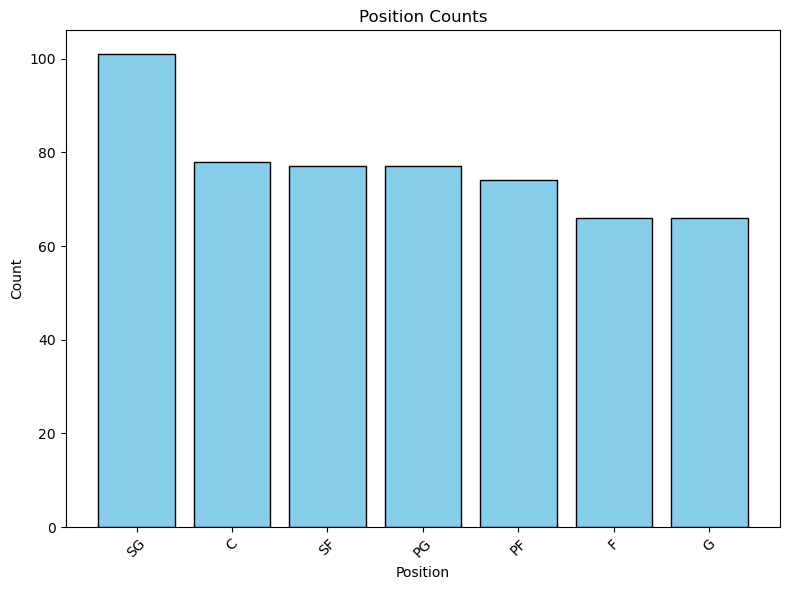

In [12]:
position_count = df['POS'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(position_count.index, position_count.values, color='skyblue', edgecolor='black')

plt.title('Position Counts')
plt.xlabel('Position')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

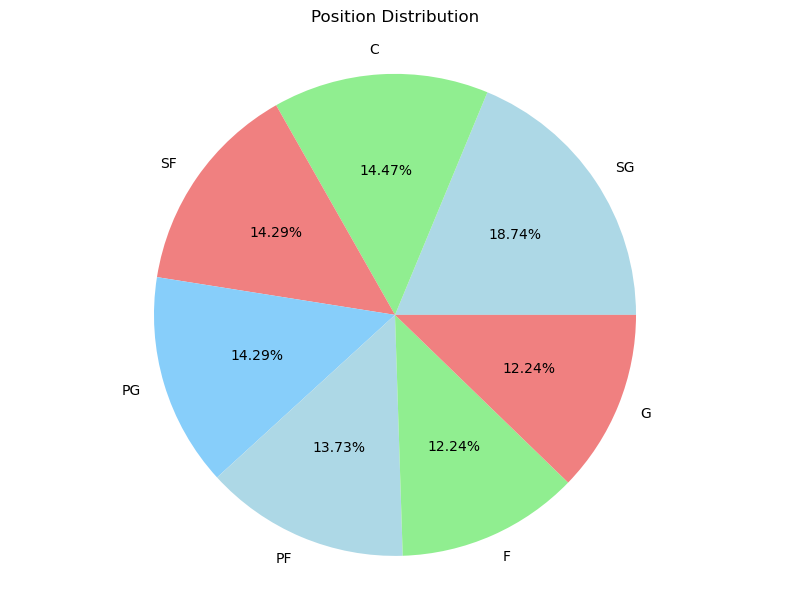

In [13]:
position_count = df['POS'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(position_count, labels=position_count.index, autopct='%1.2f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])

plt.title('Position Distribution', pad=20)

plt.axis('equal')
plt.tight_layout()
plt.show()

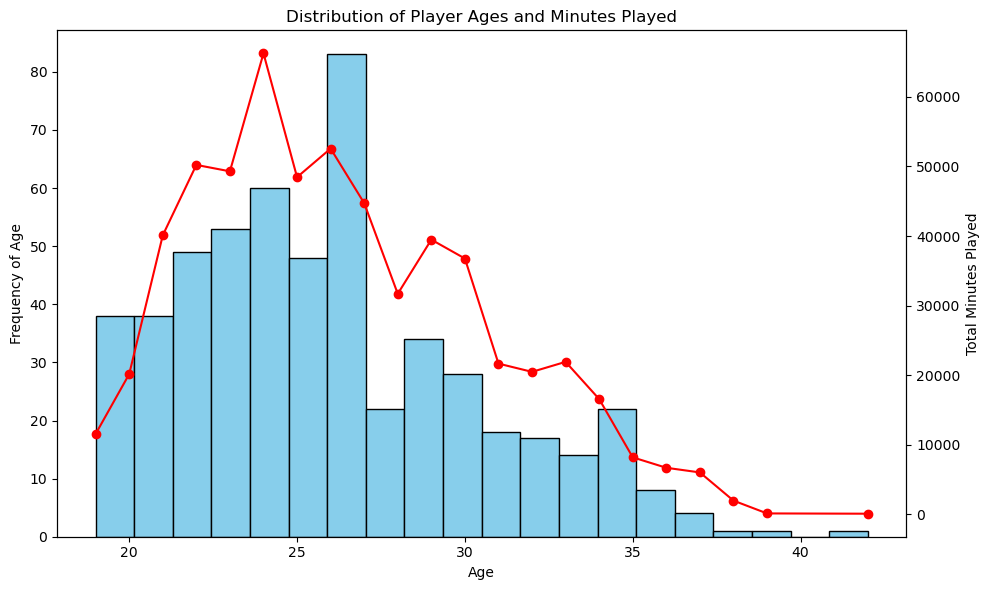

In [14]:
age_min = df.groupby('Age')['Min'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Ages and Minutes Played')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')

plt.twinx()
plt.plot(age_min['Age'], age_min['Min'], color='red', marker='o', linestyle='-')
plt.ylabel('Total Minutes Played')

plt.tight_layout()
plt.show()

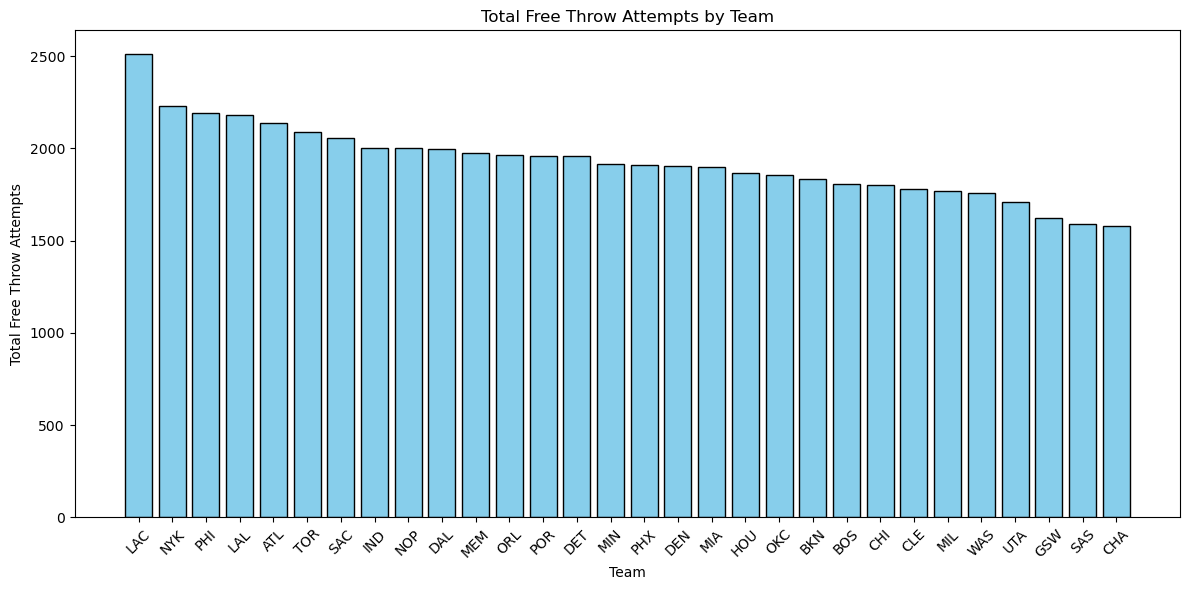

In [15]:
team_fta = df.groupby('Team')['FTA'].sum().reset_index().sort_values(by='FTA',ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(team_fta['Team'], team_fta['FTA'], color='skyblue', edgecolor='black')

plt.title('Total Free Throw Attempts by Team')
plt.xlabel('Team')
plt.ylabel('Total Free Throw Attempts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

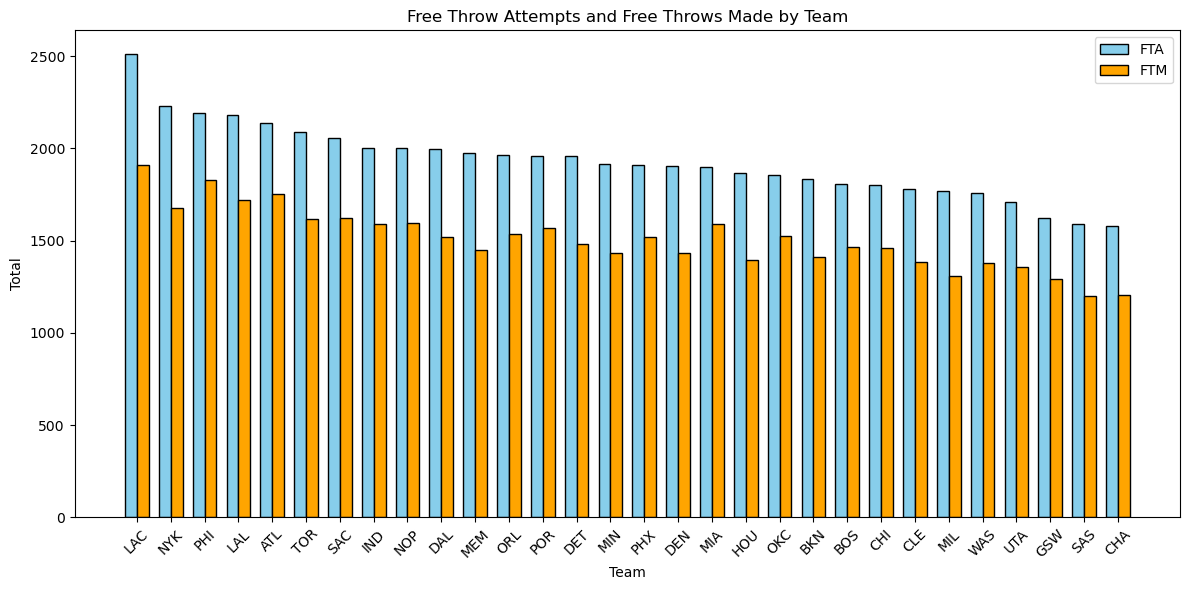

In [16]:
team_fta = df.groupby('Team')['FTA'].sum().reset_index().sort_values(by='FTA', ascending=False)
team_ftm = df.groupby('Team')['FTM'].sum().reset_index().sort_values(by='FTM', ascending=False)

team_stats = pd.merge(team_fta, team_ftm, on='Team', suffixes=('_FTA', '_FTM'))

bar_width = 0.35
index = np.arange(len(team_stats))

plt.figure(figsize=(12, 6))
plt.bar(index, team_stats['FTA'], bar_width, color='skyblue', label='FTA', edgecolor='black')
plt.bar(index + bar_width, team_stats['FTM'], bar_width, color='orange', label='FTM', edgecolor='black')

plt.title('Free Throw Attempts and Free Throws Made by Team')
plt.xlabel('Team')
plt.ylabel('Total')
plt.xticks(index + bar_width / 2, team_stats['Team'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

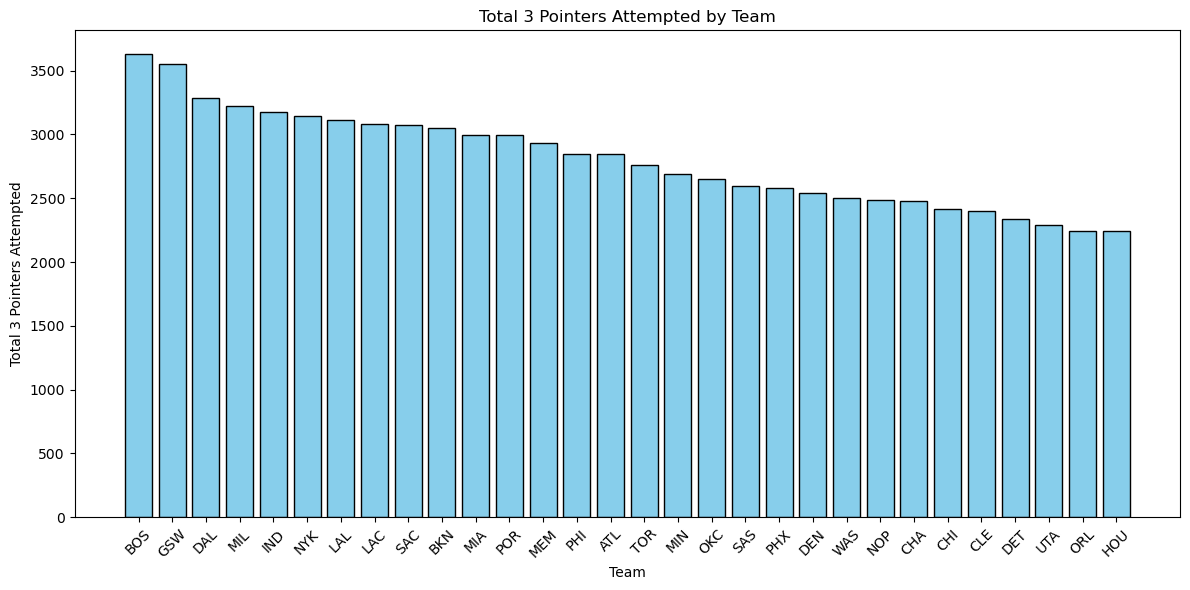

In [17]:
team_3pa = df.groupby('Team')['3PA'].sum().reset_index().sort_values(by='3PA',ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(team_3pa['Team'], team_3pa['3PA'], color='skyblue', edgecolor='black')

plt.title('Total 3 Pointers Attempted by Team')
plt.xlabel('Team')
plt.ylabel('Total 3 Pointers Attempted')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

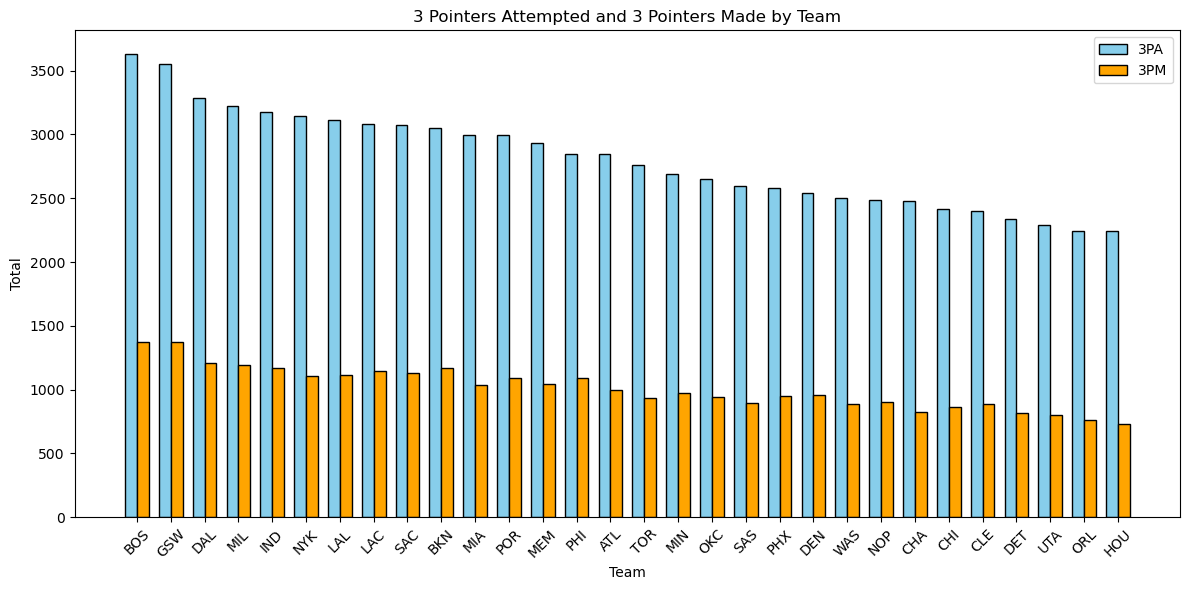

In [18]:
team_3pa = df.groupby('Team')['3PA'].sum().reset_index().sort_values(by='3PA', ascending=False)
team_3pm = df.groupby('Team')['3PM'].sum().reset_index().sort_values(by='3PM', ascending=False)

team_stats = pd.merge(team_3pa, team_3pm, on='Team', suffixes=('_3PA', '_3PM'))

bar_width = 0.35
index = np.arange(len(team_stats))

plt.figure(figsize=(12, 6))
plt.bar(index, team_stats['3PA'], bar_width, color='skyblue', label='3PA', edgecolor='black')
plt.bar(index + bar_width, team_stats['3PM'], bar_width, color='orange', label='3PM', edgecolor='black')

plt.title('3 Pointers Attempted and 3 Pointers Made by Team')
plt.xlabel('Team')
plt.ylabel('Total')
plt.xticks(index + bar_width / 2, team_stats['Team'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

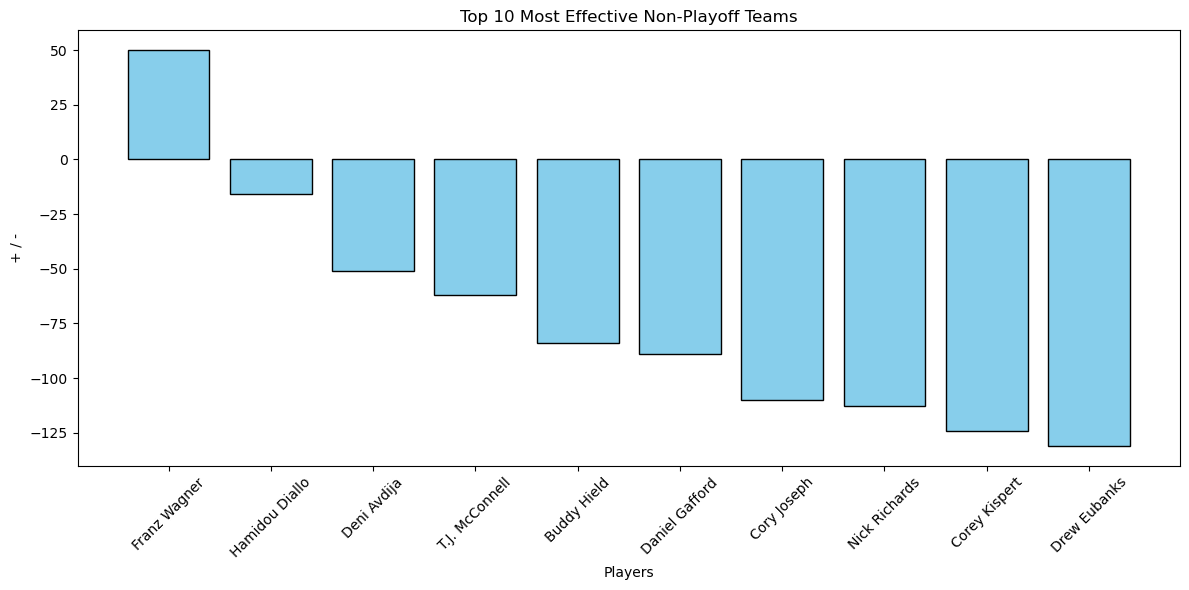

In [19]:
plus_minus = df.sort_values(by = '+/-', ascending = False)
players_plus_minus = plus_minus[(plus_minus.GP > 40) & (plus_minus.L >= 43)]
players_plus_minus = players_plus_minus.head(10)

plt.figure(figsize=(12, 6))
plt.bar(players_plus_minus['PName'], players_plus_minus['+/-'], color='skyblue', edgecolor='black')

plt.title('Top 10 Most Effective Non-Playoff Teams')
plt.xlabel('Players')
plt.ylabel('+ / -')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

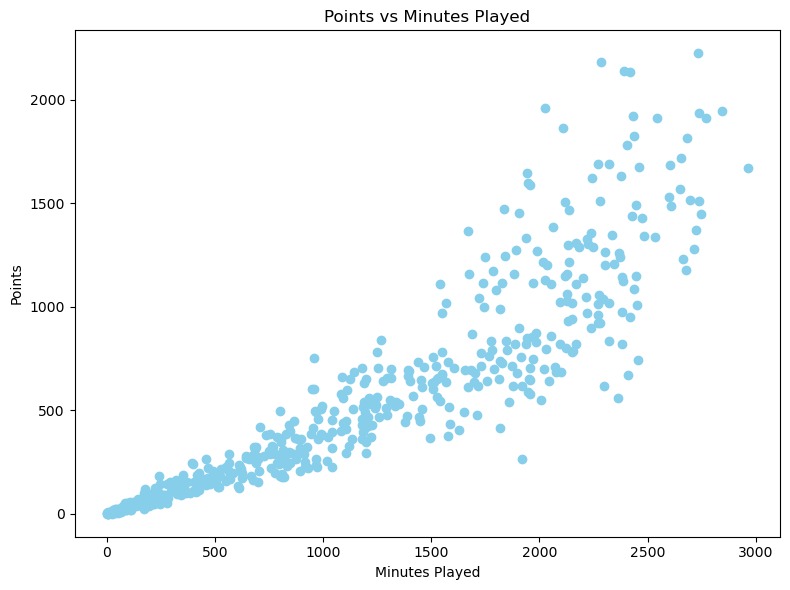

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Min'], df['PTS'], color='skyblue') 
plt.title('Points vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Points')

plt.tight_layout()
plt.show()

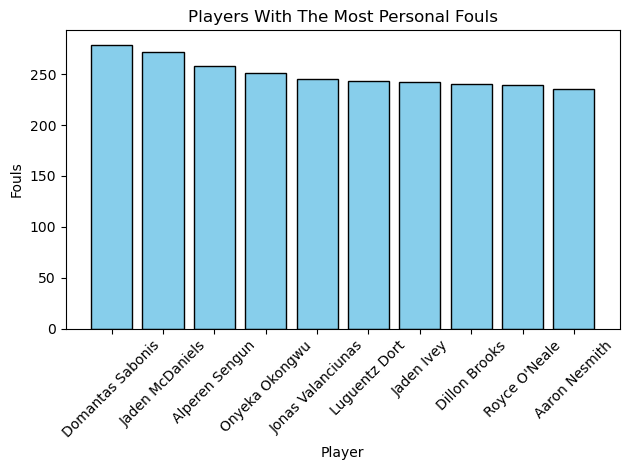

In [21]:
most_fouls = df.sort_values(by='PF',ascending=False).head(10)

plt.bar(most_fouls['PName'], most_fouls['PF'], color='skyblue', edgecolor='black')

plt.title('Players With The Most Personal Fouls')
plt.xlabel('Player')
plt.ylabel('Fouls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

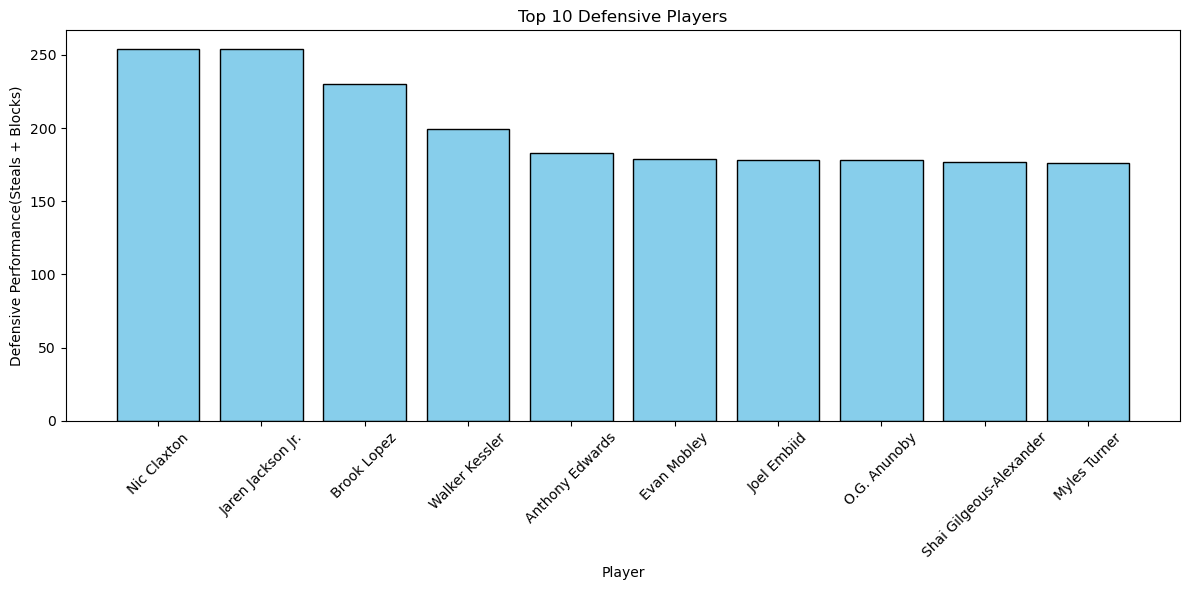

In [22]:
df['DEF_PER'] = df['STL'] + df['BLK']
top_10_def = df.sort_values(by='DEF_PER',ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_def['PName'], top_10_def['DEF_PER'], color='skyblue', edgecolor='black')

plt.title('Top 10 Defensive Players')
plt.xlabel('Player')
plt.ylabel('Defensive Performance(Steals + Blocks)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

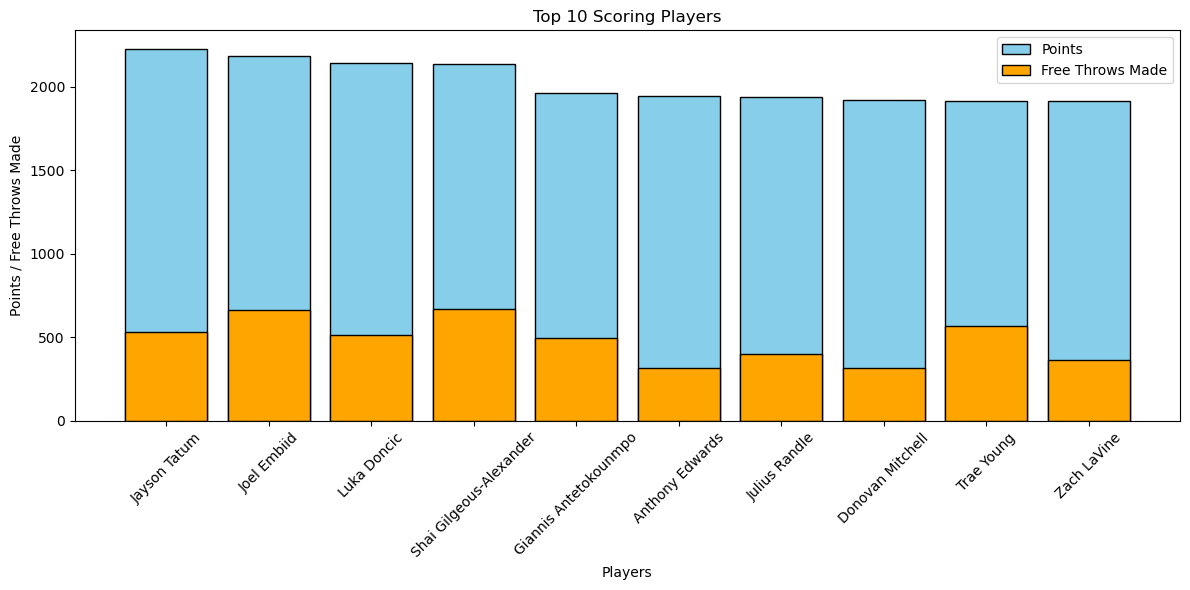

In [23]:
highest_scoring = df.sort_values(by='PTS', ascending=False).head(10)

plt.figure(figsize=(12, 6))

plt.bar(highest_scoring['PName'], highest_scoring['PTS'], color='skyblue', edgecolor='black', label='Points')
plt.bar(highest_scoring['PName'], highest_scoring['FTM'], color='orange', edgecolor='black', label='Free Throws Made')

plt.title('Top 10 Scoring Players')
plt.xlabel('Players')
plt.ylabel('Points / Free Throws Made')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()